# **GRIP @ The Sparks Foundation**
#  **By Aaryan Bagani**

# **Task-05 As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team.**

In [1]:
#importing the libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [8]:
#loading the dataset
df_deliveries=pd.read_csv("/content/drive/MyDrive/eda-sports/deliveries.csv")
df_matches=pd.read_csv("/content/drive/MyDrive/eda-sports/matches.csv")

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
df_deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [10]:
df_matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


# **Data cleaning for df_matches**

In [11]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [12]:
#finding the missing values
df_matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [13]:
#Finding out the null values in the city column wrt the date column of df_matches
df_matches[df_matches.city.isnull()][["city","date"]]

,city,date
461,NaN,2014-04-19
462,NaN,2014-04-19
466,NaN,2014-04-23
468,NaN,2014-04-25
469,NaN,2014-04-25
474,NaN,2014-04-28
476,NaN,2014-04-30


In [14]:
#Below its quite clear that all the matches with city as NaN as its value were hosted in the Dubai International Cricket Stadium, hence replace the "city" NaN values with "Dubai"
df_matches.iloc[461:476][["city", "date", "venue"]]

,city,date,venue
461,NaN,2014-04-19,Dubai International Cricket Stadium
462,NaN,2014-04-19,Dubai International Cricket Stadium
463,Sharjah,2014-04-20,Sharjah Cricket Stadium
464,Abu Dhabi,2014-04-21,Sheikh Zayed Stadium
465,Sharjah,2014-04-22,Sharjah Cricket Stadium
466,NaN,2014-04-23,Dubai International Cricket Stadium
467,Sharjah,2014-04-24,Sharjah Cricket Stadium
468,NaN,2014-04-25,Dubai International Cricket Stadium
469,NaN,2014-04-25,Dubai International Cricket Stadium
470,Abu Dhabi,2014-04-26,Sheikh Zayed Stadium


In [15]:
#Lets check for the columns "winner", "player_of_match" wrt column "result" to further check its importance
df_matches[df_matches.winner.isnull()][["winner","winner","player_of_match"]]

,winner,winner,player_of_match
300,NaN,NaN,NaN
545,NaN,NaN,NaN
570,NaN,NaN,NaN
744,NaN,NaN,NaN


# **Data cleaning proces for the df_deliveries**

In [16]:
df_deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [17]:
#finding the missing values
df_deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [18]:
#IPL Team analysis
df_deliveries.batting_team.value_counts()

Mumbai Indians                 22619
Kings XI Punjab                20931
Royal Challengers Bangalore    20908
Kolkata Knight Riders          20858
Chennai Super Kings            19762
Delhi Daredevils               18786
Rajasthan Royals               17292
Sunrisers Hyderabad            12908
Deccan Chargers                 9034
Pune Warriors                   5443
Gujarat Lions                   3566
Delhi Capitals                  1909
Rising Pune Supergiant          1900
Kochi Tuskers Kerala            1582
Rising Pune Supergiants         1580
Name: batting_team, dtype: int64

In [19]:
#"Rising Pune Supergiant" and "Rising Pune Supergiants" are both the same but are repeated

df_deliveries["batting_team"].replace(to_replace="Rising Pune Supergiant", value="Rising Pune Supergiants", inplace=True)

In [20]:
df_deliveries.batting_team.value_counts()

Mumbai Indians                 22619
Kings XI Punjab                20931
Royal Challengers Bangalore    20908
Kolkata Knight Riders          20858
Chennai Super Kings            19762
Delhi Daredevils               18786
Rajasthan Royals               17292
Sunrisers Hyderabad            12908
Deccan Chargers                 9034
Pune Warriors                   5443
Gujarat Lions                   3566
Rising Pune Supergiants         3480
Delhi Capitals                  1909
Kochi Tuskers Kerala            1582
Name: batting_team, dtype: int64

In [21]:
df_matches["winner"].value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                  10
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

In [22]:
df_matches["winner"].replace(to_replace="Rising Pune Supergiant",value="Rising Pune Supergiants", inplace=True)

In [23]:
df_matches["winner"].value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Rising Pune Supergiants         15
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Name: winner, dtype: int64

In [24]:
#total ipl teams
print(len(df_matches["winner"].value_counts())," IPL Teams")

14  IPL Teams


# **Teams and their IPL Matches Wins**

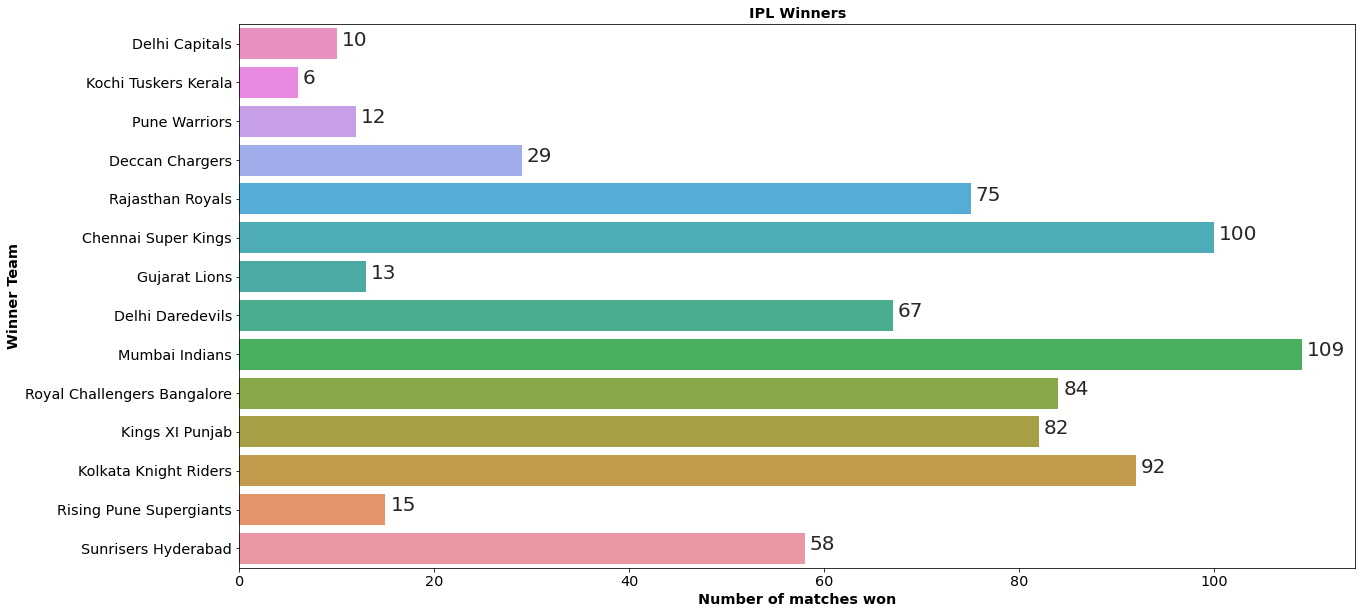

In [25]:
plt.figure(figsize=(20,10))
winners=sns.countplot(data=df_matches, y="winner")
plt.xlabel("Number of matches won", fontsize="x-large", fontweight="bold")
plt.ylabel("Winner Team",fontsize="x-large", fontweight="bold")
plt.xticks(fontsize="x-large")
plt.yticks(fontsize="x-large")
plt.title("IPL Winners", fontsize="x-large", fontweight="bold")
sns.set_style("darkgrid")
sns.set_style("ticks")
sns.set_palette("PRGn")
sns.set_context("talk")
winners.invert_yaxis()
for rect in winners.patches:
    winners.text (rect.get_width()+0.5, rect.get_y()+0.35,rect.get_width(), fontsize = 20)

# **Maximum runs by which a team won the match**

In [26]:
idmax=df_matches["win_by_runs"].max()

print(idmax)

146


In [27]:
df_matches[df_matches["win_by_runs"]==idmax]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
43,44,2017,Delhi,2017-05-06,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan,NaN


**Mumbai Indians beated Delhi Daredevils by 146 runs**

# **Now lets check by what maximum wickets a team can win**

In [28]:
maxwics=df_matches["win_by_wickets"].max()
print(maxwics)

10


In [29]:
#teams that won by maximum wickets
df_matches[df_matches["win_by_wickets"]==maxwics]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
34,35,2017,Chandigarh,2017-04-30,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,10,Sandeep Sharma,"Punjab Cricket Association IS Bindra Stadium, ...",YC Barde,CK Nandan,NaN
71,72,2008,Mumbai,2008-04-27,Mumbai Indians,Deccan Chargers,Deccan Chargers,field,normal,0,Deccan Chargers,0,10,AC Gilchrist,Dr DY Patil Sports Academy,Asad Rauf,SL Shastri,NaN
119,120,2009,Cape Town,2009-04-19,Kings XI Punjab,Delhi Daredevils,Delhi Daredevils,field,normal,1,Delhi Daredevils,0,10,DL Vettori,Newlands,MR Benson,SD Ranade,NaN
183,184,2010,Bangalore,2010-03-18,Rajasthan Royals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,10,JH Kallis,M Chinnaswamy Stadium,K Hariharan,DJ Harper,NaN
298,299,2011,Mumbai,2011-05-20,Mumbai Indians,Rajasthan Royals,Mumbai Indians,bat,normal,0,Rajasthan Royals,0,10,SR Watson,Wankhede Stadium,RE Koertzen,PR Reiffel,NaN
376,377,2012,Jaipur,2012-05-20,Rajasthan Royals,Mumbai Indians,Rajasthan Royals,bat,normal,0,Mumbai Indians,0,10,DR Smith,Sawai Mansingh Stadium,HDPK Dharmasena,C Shamshuddin,NaN
390,391,2013,Chandigarh,2013-04-10,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,10,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Aleem Dar,C Shamshuddin,NaN
542,543,2015,Delhi,2015-04-26,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,10,VR Aaron,Feroz Shah Kotla,M Erasmus,S Ravi,NaN
590,591,2016,Rajkot,2016-04-21,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,10,B Kumar,Saurashtra Cricket Association Stadium,K Bharatan,HDPK Dharmasena,NaN


In [30]:
df_matches[df_matches["win_by_wickets"]==maxwics]["winner"].value_counts()

Royal Challengers Bangalore    3
Chennai Super Kings            1
Rajasthan Royals               1
Kings XI Punjab                1
Kolkata Knight Riders          1
Deccan Chargers                1
Mumbai Indians                 1
Sunrisers Hyderabad            1
Delhi Daredevils               1
Name: winner, dtype: int64

In [31]:
#Total number of matches in which a team won by 10 wickets are
df_matches[df_matches["win_by_wickets"]==maxwics]["id"].count()

11

# **IPL TITLE WINNERS**

In [32]:
winsn=df_matches[["winner","season"]]
print(winsn)

                          winner  season
0            Sunrisers Hyderabad    2017
1        Rising Pune Supergiants    2017
2          Kolkata Knight Riders    2017
3                Kings XI Punjab    2017
4    Royal Challengers Bangalore    2017
..                           ...     ...
751               Mumbai Indians    2019
752               Mumbai Indians    2019
753               Delhi Capitals    2019
754          Chennai Super Kings    2019
755               Mumbai Indians    2019

[756 rows x 2 columns]


In [33]:
most_title_holder={}

for i in (sorted(winsn.season.unique())):
    most_title_holder[i]=winsn[winsn.season==i]["winner"].tail(1).values[0]

season_winners=pd.Series(most_title_holder)
season_winners=pd.DataFrame(season_winners, columns=["Season_Winner"])

In [34]:
season_winners

,Season_Winner
2008,Rajasthan Royals
2009,Deccan Chargers
2010,Chennai Super Kings
2011,Chennai Super Kings
2012,Kolkata Knight Riders
2013,Mumbai Indians
2014,Kolkata Knight Riders
2015,Mumbai Indians
2016,Sunrisers Hyderabad
2017,Mumbai Indians


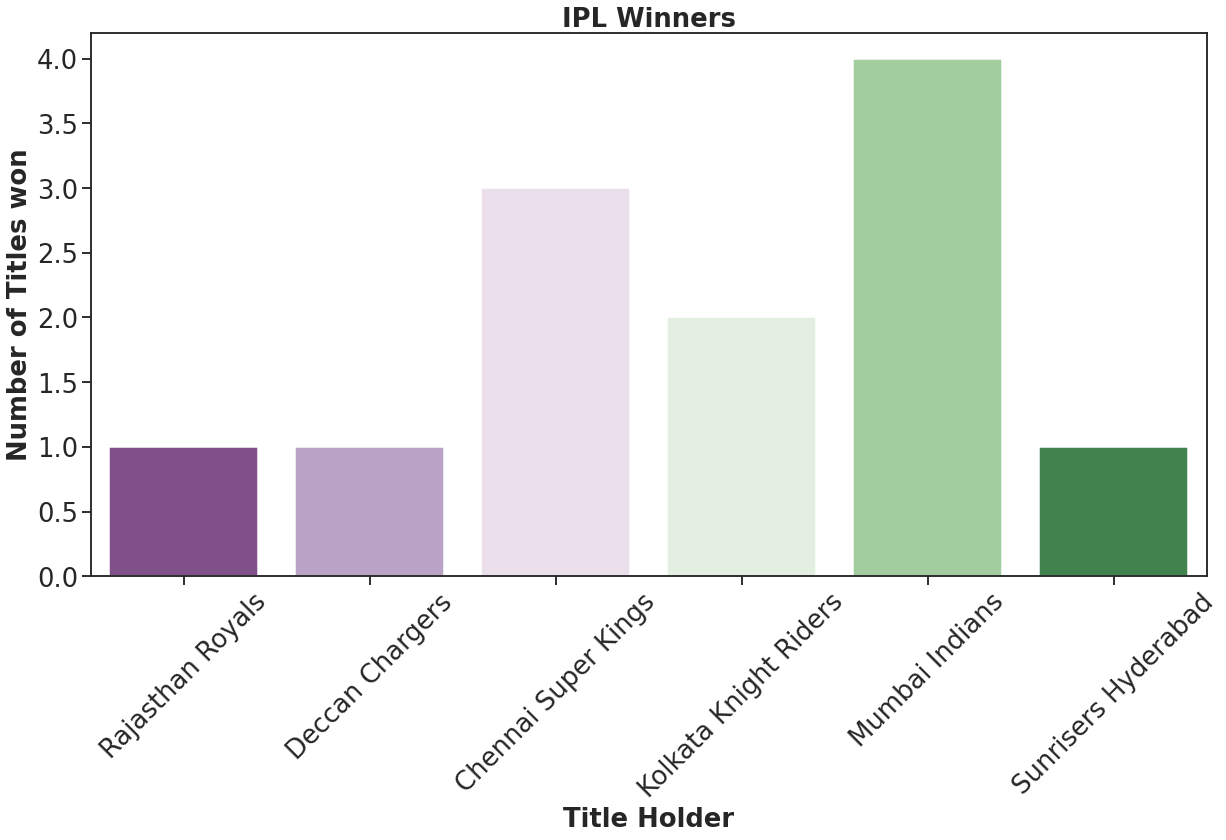

In [35]:
plt.figure(figsize=(20,10))
sns_winners=sns.countplot(data=season_winners, x="Season_Winner")
plt.xlabel("Title Holder", fontsize="x-large", fontweight="bold")
plt.ylabel("Number of Titles won",fontsize="x-large", fontweight="bold")
plt.xticks(fontsize="x-large", rotation=45)

plt.yticks(fontsize="x-large")
plt.title("IPL Winners", fontsize="x-large", fontweight="bold")
sns.set_style("darkgrid")
sns.set_style("ticks")
sns.set_palette("PRGn")
sns.set_context("talk")
winners.invert_xaxis()

Mumbai Indians won the maximum number of IPL Titles i.e 3 and runners up being Chennai Super Kings holding 2 IPL titles

# **Check whether winning a toss had any positive influence on winning**

In [36]:
toss_win=df_matches["toss_winner"].value_counts()
print(toss_win)

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Kings XI Punjab                81
Royal Challengers Bangalore    81
Rajasthan Royals               80
Delhi Daredevils               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64


In [37]:
df_matches["toss_winner"].replace(to_replace="Rising Pune Supergiant", value="Rising Pune Supergiants", inplace=True)

In [38]:
toss_win=df_matches["toss_winner"].value_counts()
print(toss_win)

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Kings XI Punjab                81
Royal Challengers Bangalore    81
Rajasthan Royals               80
Delhi Daredevils               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Rising Pune Supergiants        13
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Name: toss_winner, dtype: int64


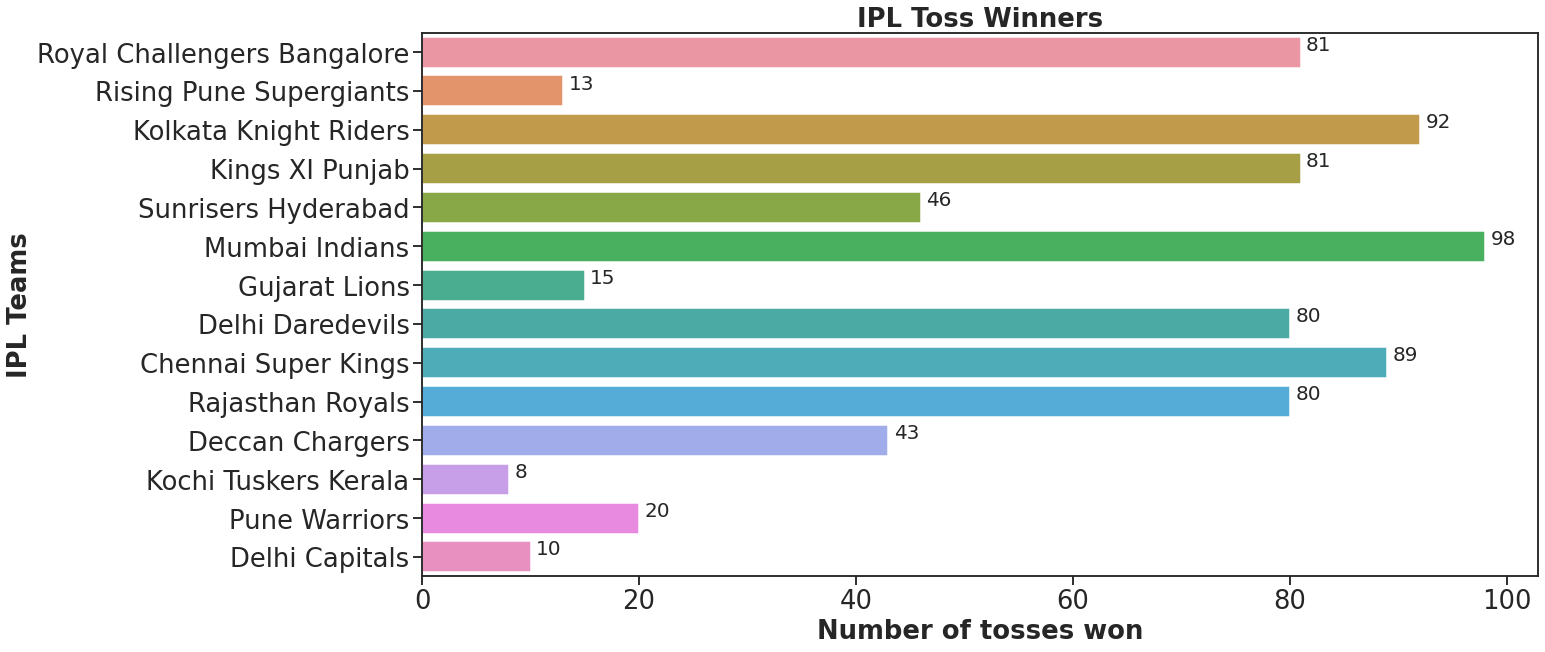

In [39]:
plt.figure(figsize=(20,10))
toss_winners=sns.countplot(data=df_matches, y="toss_winner")
plt.xlabel("Number of tosses won", fontsize="x-large", fontweight="bold")
plt.ylabel("IPL Teams",fontsize="x-large", fontweight="bold")
plt.xticks(fontsize="x-large")
plt.yticks(fontsize="x-large")
plt.title("IPL Toss Winners", fontsize="x-large", fontweight="bold")
sns.set_style("darkgrid")
sns.set_style("ticks")
sns.set_palette("PRGn")
sns.set_context("talk")
winners.invert_yaxis()
for rect in toss_winners.patches:
    toss_winners.text (rect.get_width()+0.5, rect.get_y()+0.35,rect.get_width(), fontsize = 20)

It is quite evident that winning the toss most number of times made Mumbai Indians win the most IPL Titles and also KKR and CSK to be among the top 3

# **How did choosing Fielding or Batting decide who will win ?**

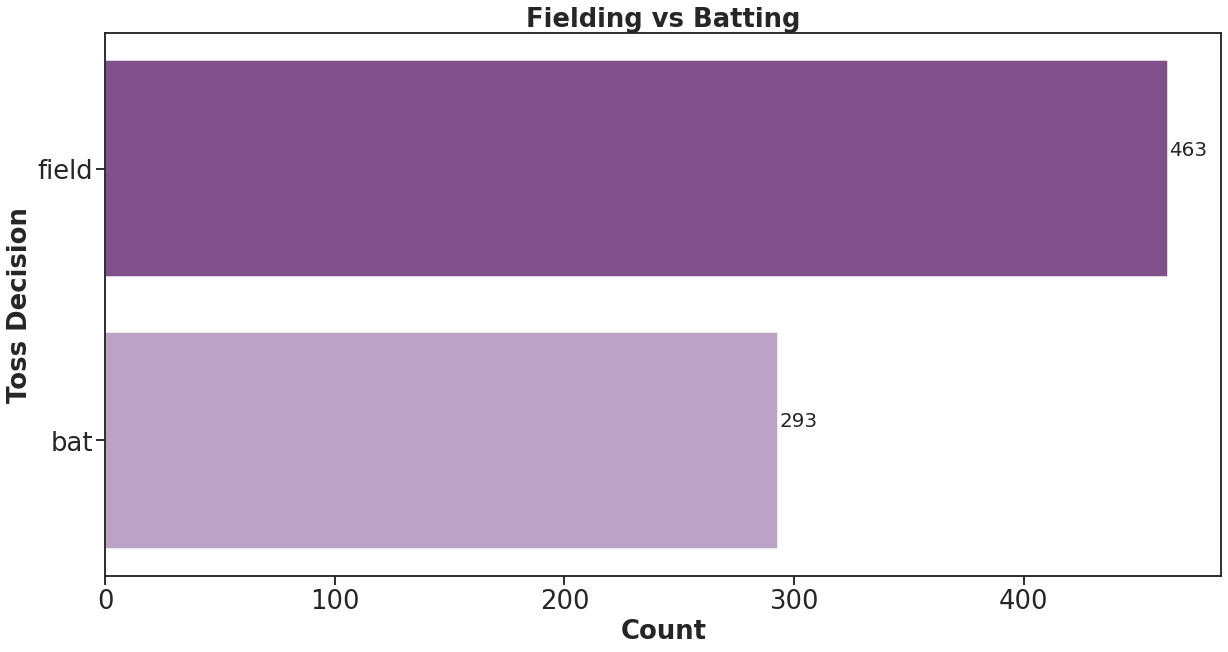

In [40]:
plt.figure(figsize=(20,10))
toss_selection = sns.countplot(data=df_matches, y="toss_decision")
plt.xlabel("Count", fontsize="x-large", fontweight="bold")
plt.ylabel("Toss Decision",fontsize="x-large", fontweight="bold")
plt.xticks(fontsize="x-large")
plt.yticks(fontsize="x-large")
plt.title("Fielding vs Batting", fontsize="x-large", fontweight="bold")
sns.set_style("darkgrid")
sns.set_style("ticks")
sns.set_palette("PRGn")
sns.set_context("talk")
winners.invert_yaxis()
for rect in toss_selection.patches:
    toss_selection.text (rect.get_width()+0.5, rect.get_y()+0.35,rect.get_width(), fontsize = 20)

# **Check whether batting in the 1st innings helped teams in winning the match**

In [41]:
bat_win=df_matches[df_matches['win_by_runs']!=0]['winner'].value_counts()
bat_win

Mumbai Indians                 57
Chennai Super Kings            52
Kings XI Punjab                38
Kolkata Knight Riders          36
Royal Challengers Bangalore    35
Sunrisers Hyderabad            30
Rajasthan Royals               27
Delhi Daredevils               25
Deccan Chargers                18
Rising Pune Supergiants         7
Pune Warriors                   6
Delhi Capitals                  3
Kochi Tuskers Kerala            2
Gujarat Lions                   1
Name: winner, dtype: int64

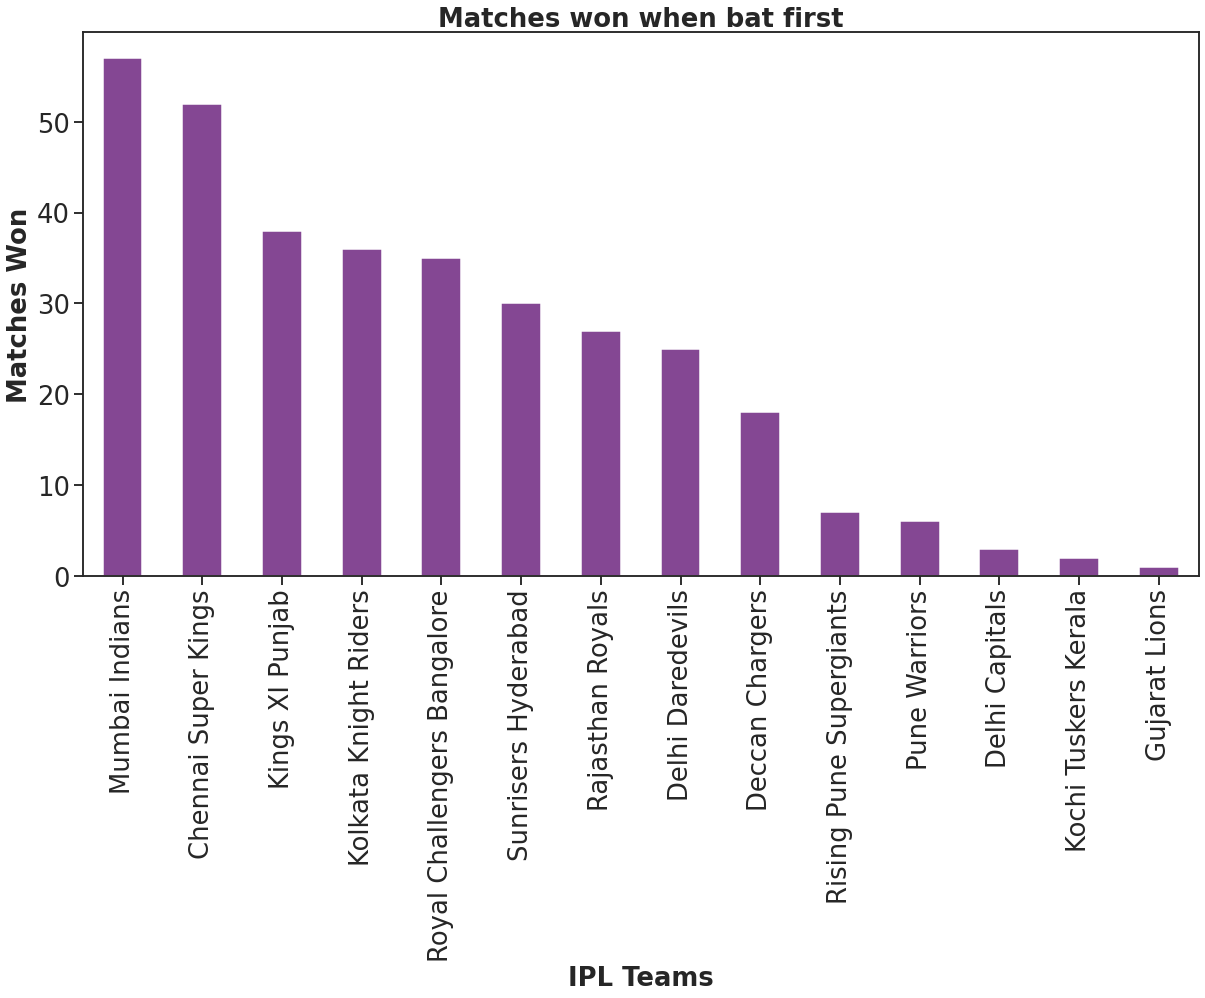

In [42]:
plt.figure(figsize=(20,10))
bat_winners=bat_win.plot(kind="bar")

plt.xlabel("IPL Teams", fontsize="x-large", fontweight="bold")
plt.ylabel("Matches Won",fontsize="x-large", fontweight="bold")
plt.xticks(fontsize="x-large")
plt.yticks(fontsize="x-large")
plt.title("Matches won when bat first", fontsize="x-large", fontweight="bold")
sns.set_style("darkgrid")
sns.set_style("ticks")
sns.set_palette("PRGn")
sns.set_context("talk")
winners.invert_yaxis()

# **Check whether bowling in the 1st innings helped teams in winning the match**

In [43]:
ball_win=df_matches[df_matches['win_by_wickets']!=0]['winner'].value_counts()
ball_win

Kolkata Knight Riders          56
Mumbai Indians                 50
Chennai Super Kings            48
Royal Challengers Bangalore    48
Rajasthan Royals               46
Delhi Daredevils               42
Kings XI Punjab                42
Sunrisers Hyderabad            27
Gujarat Lions                  12
Deccan Chargers                11
Rising Pune Supergiants         8
Pune Warriors                   6
Delhi Capitals                  6
Kochi Tuskers Kerala            4
Name: winner, dtype: int64

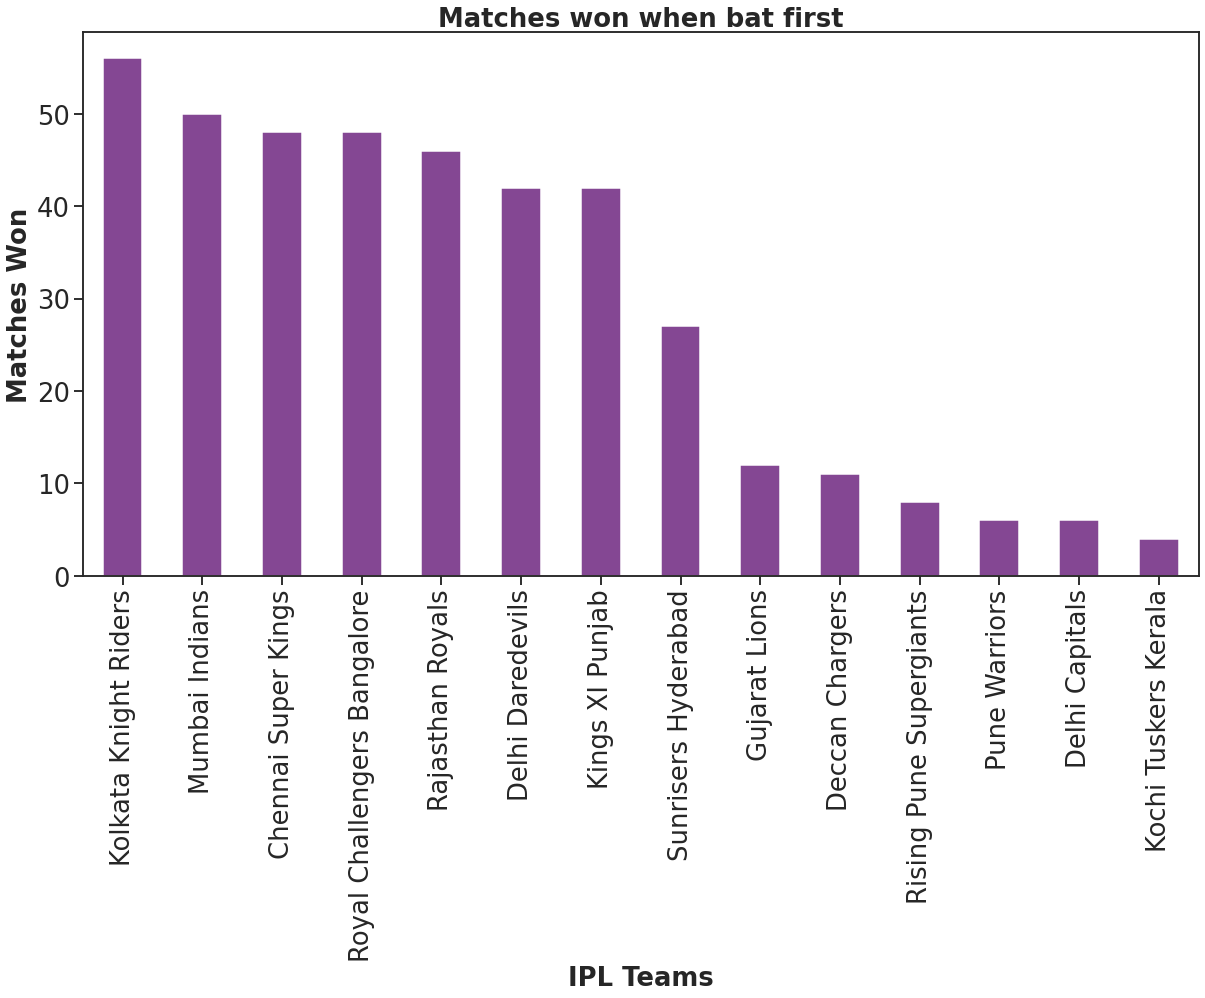

In [44]:
plt.figure(figsize=(20,10))
ball_winners=ball_win.plot(kind="bar")

plt.xlabel("IPL Teams", fontsize="x-large", fontweight="bold")
plt.ylabel("Matches Won",fontsize="x-large", fontweight="bold")
plt.xticks(fontsize="x-large")
plt.yticks(fontsize="x-large")
plt.title("Matches won when bat first", fontsize="x-large", fontweight="bold")
sns.set_style("darkgrid")
sns.set_style("ticks")
sns.set_palette("PRGn")
sns.set_context("talk")
winners.invert_yaxis()

KKR wins the maximum number of matches when they choose to field first and bat second

**Conclusion**

The top 3 teams that have won most matches are Mumbai Indians, CSK and KKR

Mumbai won 3 IPL titles , CSK won 3 IPL Titles and KKR won 2 IPL Titles.

Winning tosses is propotional to winning matches as Mumbai Indians , CSK and KKR have won both maximum matches and tosses

The top winners seems to choose fielding first in any match, and also tend to catch up the score and win.

Mumbai Indians, CSK and Kings 11 Punjab won the maximum matches when they chose to bat first, with Mumbai Indians winning almost more than 50 matches when they bat first.

KKR on the other hand tends to win the most when they field first and chase the target in the second innings

# **Bat and Bowl**

In [45]:
most_bat=df_deliveries["batsman"].value_counts()[:10]

print("players that played the most deliveries are ", most_bat)

players that played the most deliveries are  V Kohli       4211
SK Raina      4044
RG Sharma     3816
S Dhawan      3776
G Gambhir     3524
RV Uthappa    3492
DA Warner     3398
MS Dhoni      3318
AM Rahane     3215
CH Gayle      3131
Name: batsman, dtype: int64


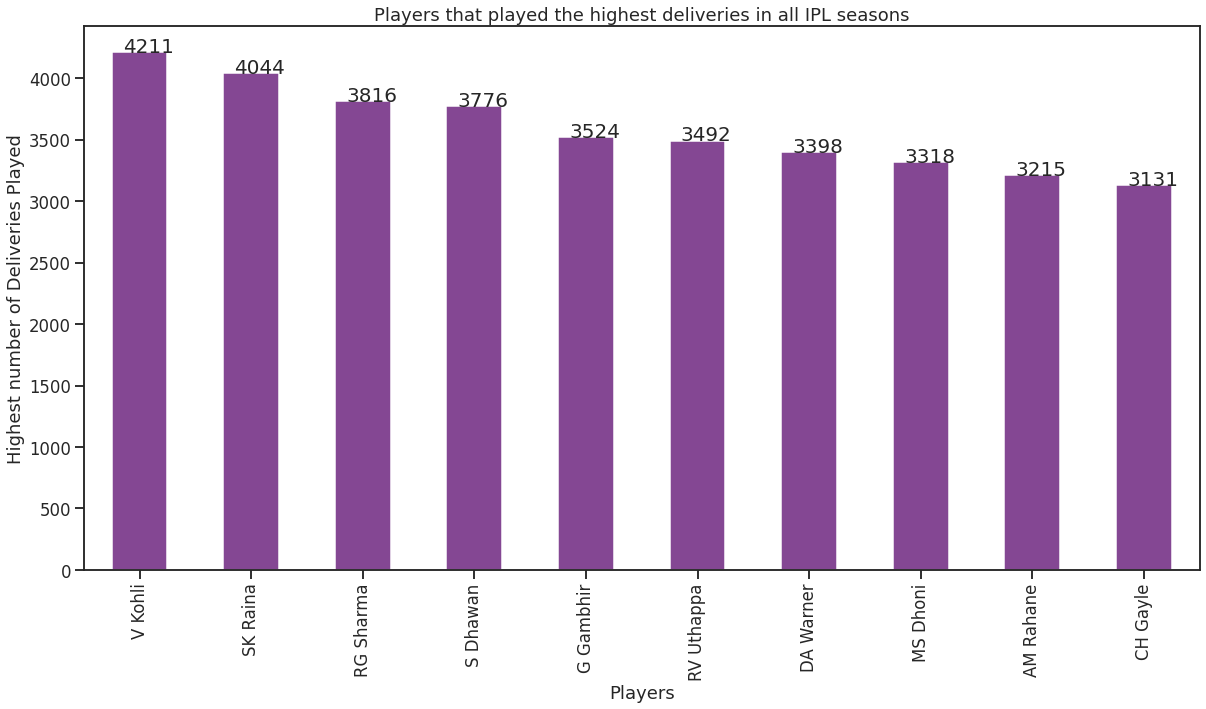

In [46]:
players_bat=most_bat.plot(kind="bar", figsize=(20,10))
plt.title("Players that played the highest deliveries in all IPL seasons")
plt.xlabel("Players")
plt.ylabel("Highest number of Deliveries Played")
for i in players_bat.patches:
        players_bat.text(i.get_x()+0.1, i.get_height(), i.get_height(), fontsize=20)

In [47]:
most_bowl=df_deliveries["bowler"].value_counts()[:10]

print("players with highest deliveries ", most_bowl)

players with highest deliveries  Harbhajan Singh    3451
A Mishra           3172
PP Chawla          3157
R Ashwin           3016
SL Malinga         2974
DJ Bravo           2711
B Kumar            2707
P Kumar            2637
UT Yadav           2605
SP Narine          2600
Name: bowler, dtype: int64


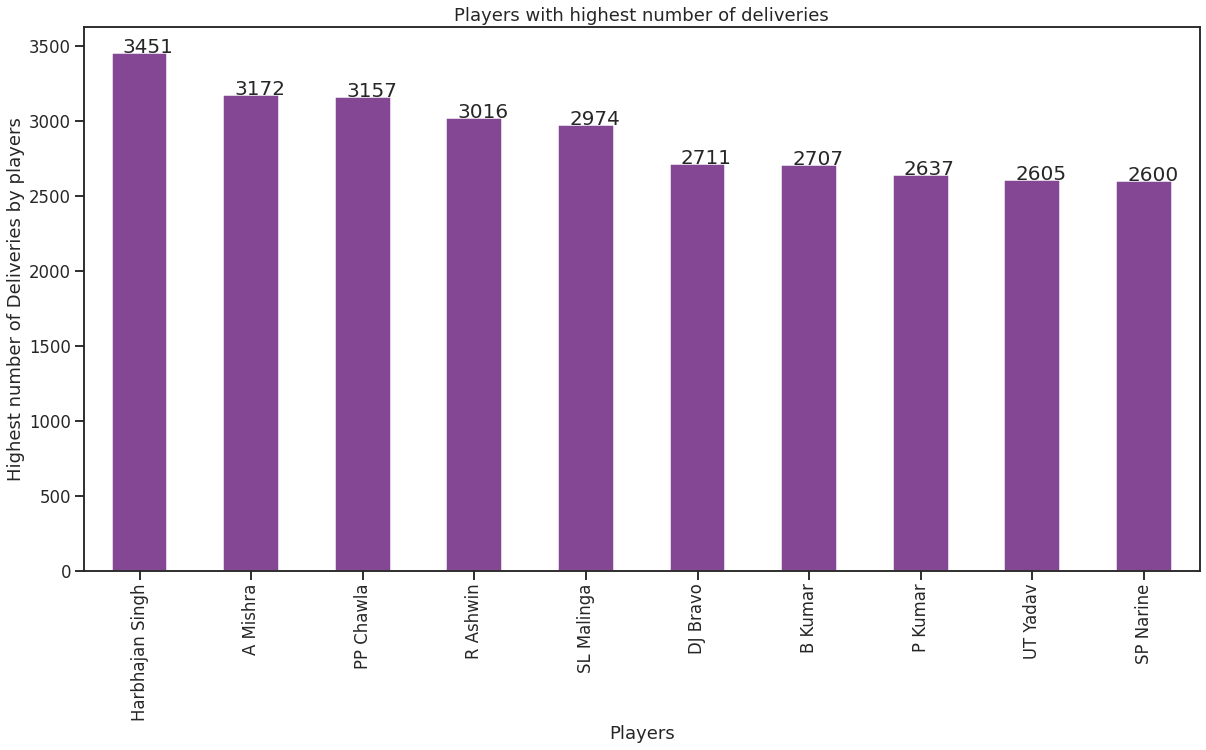

In [48]:
players_bowl=most_bowl.plot(kind="bar", figsize=(20,10))
plt.title("Players with highest number of deliveries")
plt.xlabel("Players")
plt.ylabel("Highest number of Deliveries by players")
for i in players_bowl.patches:
        players_bowl.text(i.get_x()+0.1, i.get_height(), i.get_height(), fontsize=20)

# **Analysis of the top scorers**

In [49]:
top_scorers=df_deliveries.groupby("batsman")["batsman_runs"].sum().sort_values(ascending=False)[0:10]
print(top_scorers)

batsman
V Kohli           5434
SK Raina          5415
RG Sharma         4914
DA Warner         4741
S Dhawan          4632
CH Gayle          4560
MS Dhoni          4477
RV Uthappa        4446
AB de Villiers    4428
G Gambhir         4223
Name: batsman_runs, dtype: int64


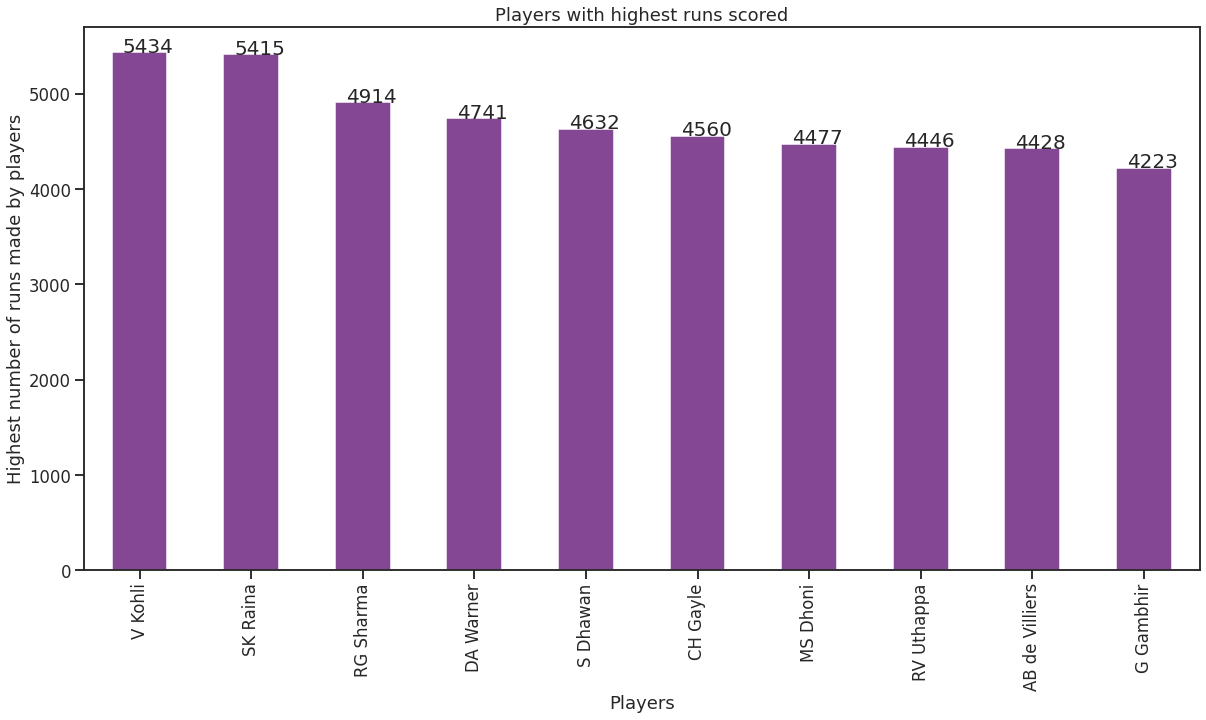

In [50]:
players_score=top_scorers.plot(kind="bar", figsize=(20,10))
plt.title("Players with highest runs scored")
plt.xlabel("Players")
plt.ylabel("Highest number of runs made by players")
for i in players_score.patches:
        players_score.text(i.get_x()+0.1, i.get_height(), i.get_height(), fontsize=20)

From the above bar chart of the "Players with highest runs scored" it is Virat Kholi who scored the most i.e 5343 runs in all the IPL matches, with SK Raina being at the second spot with 5415 runs scored overall

In [51]:
extra_runs=df_deliveries.groupby("bowler")["extra_runs"].sum().sort_values(ascending=False)[0:10]
print(extra_runs)

bowler
SL Malinga         293
P Kumar            236
UT Yadav           219
DJ Bravo           201
B Kumar            197
I Sharma           194
RP Singh           181
SR Watson          171
DW Steyn           171
Harbhajan Singh    170
Name: extra_runs, dtype: int64


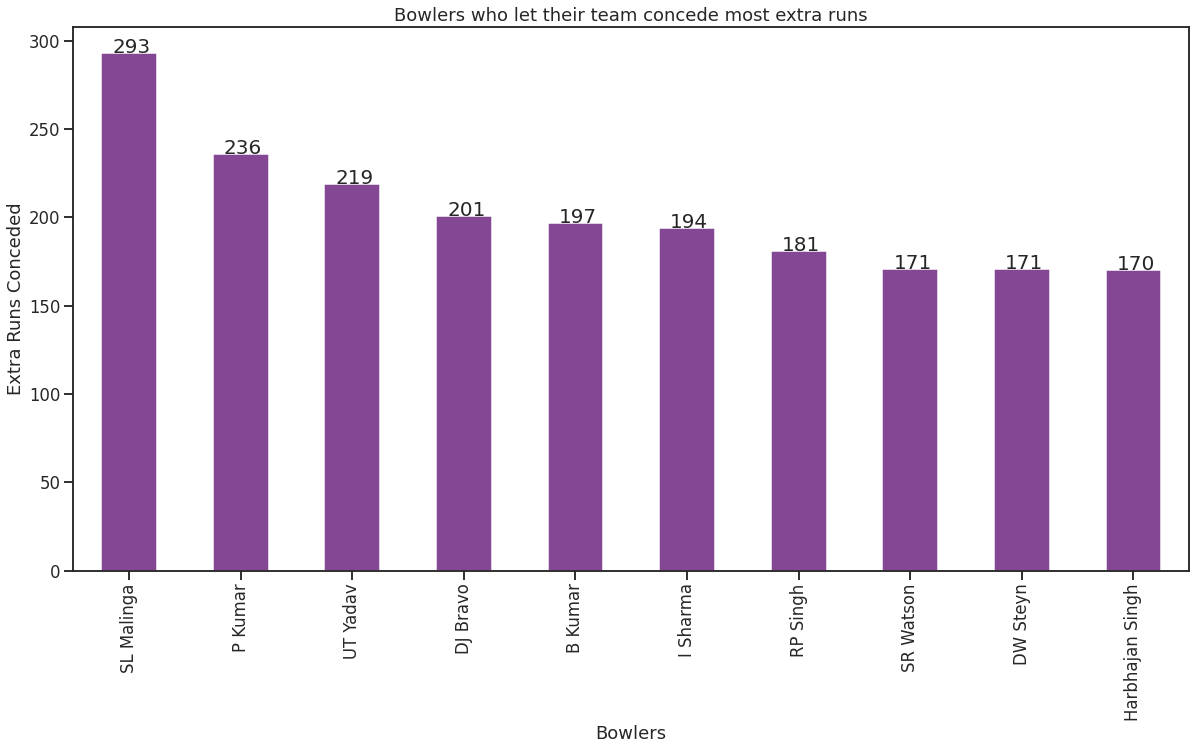

In [52]:
extra_runs_concede=extra_runs.plot(kind="bar", figsize=(20,10))
plt.title("Bowlers who let their team concede most extra runs")
plt.xlabel("Bowlers")
plt.ylabel("Extra Runs Conceded")
for i in extra_runs_concede.patches:
        extra_runs_concede.text(i.get_x()+0.1, i.get_height(), i.get_height(), fontsize=20)

Top 3 bowlers that conceded the most runs in all the IPL matches combined were SL Malinga with 293 runs, Kumar witj 236 runs and yadav with 219 runs

# **Bowlers that took out a Batsman the most times**

In [53]:
bat_vs_bowl=df_deliveries.groupby("bowler")["player_dismissed"].value_counts().sort_values(ascending=False)[:10]
print(bat_vs_bowl)

bowler         player_dismissed
Z Khan         MS Dhoni            7
PP Ojha        MS Dhoni            7
R Vinay Kumar  RG Sharma           6
B Kumar        AM Rahane           6
MM Sharma      AT Rayudu           6
A Mishra       RG Sharma           6
A Nehra        V Kohli             6
SP Narine      RG Sharma           6
PP Chawla      AT Rayudu           6
R Ashwin       RV Uthappa          6
Name: player_dismissed, dtype: int64


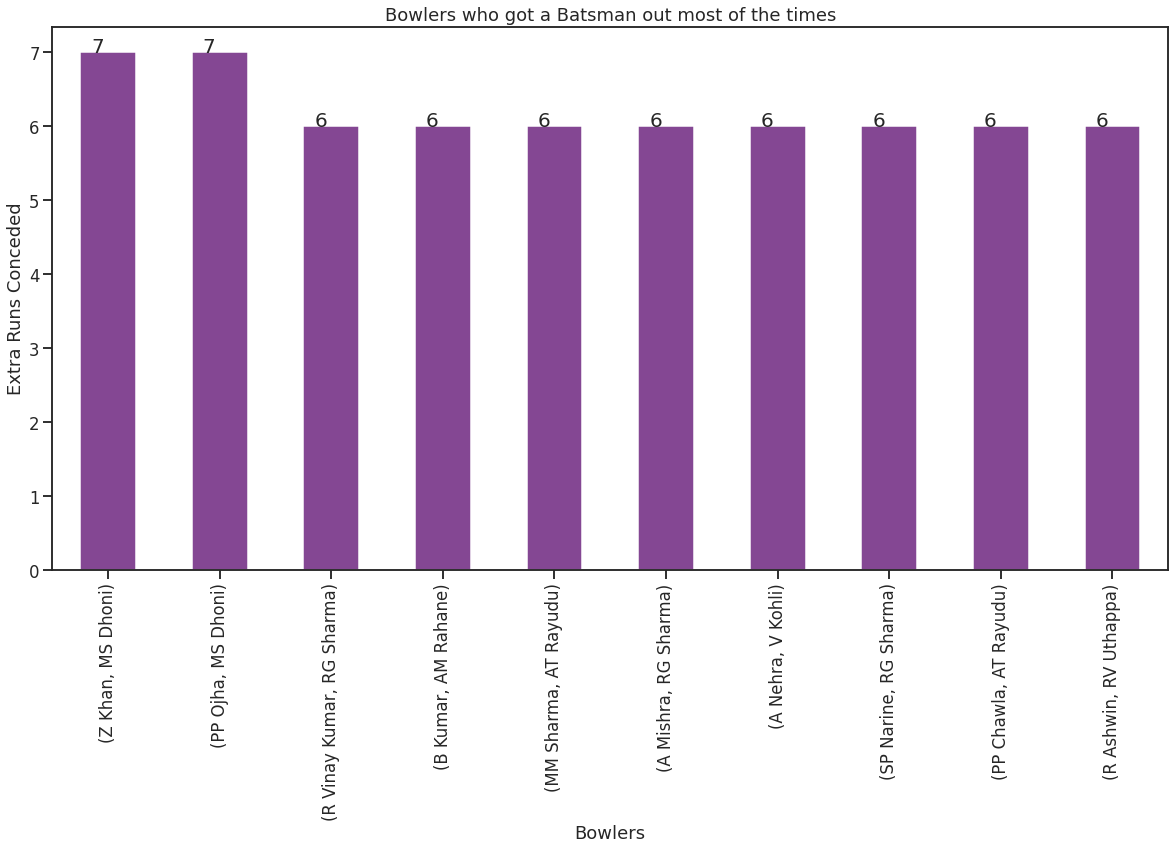

In [54]:
bowler_got_batsman=bat_vs_bowl.plot(kind="bar", figsize=(20,10))
plt.title("Bowlers who got a Batsman out most of the times")
plt.xlabel("Bowlers")
plt.ylabel("Extra Runs Conceded")
for i in bowler_got_batsman.patches:
        bowler_got_batsman.text(i.get_x()+0.1, i.get_height(), i.get_height(), fontsize=20)


Looks like MS Dhoni got out by Z Khan and PP Ojha by almost 7 times in all IPL seasons played yet

In [55]:
top_venue=df_matches["venue"].value_counts()[:10]
print(top_venue)

Eden Gardens                                  77
Wankhede Stadium                              73
M Chinnaswamy Stadium                         73
Feroz Shah Kotla                              67
Rajiv Gandhi International Stadium, Uppal     56
MA Chidambaram Stadium, Chepauk               49
Sawai Mansingh Stadium                        47
Punjab Cricket Association Stadium, Mohali    35
Maharashtra Cricket Association Stadium       21
Dr DY Patil Sports Academy                    17
Name: venue, dtype: int64


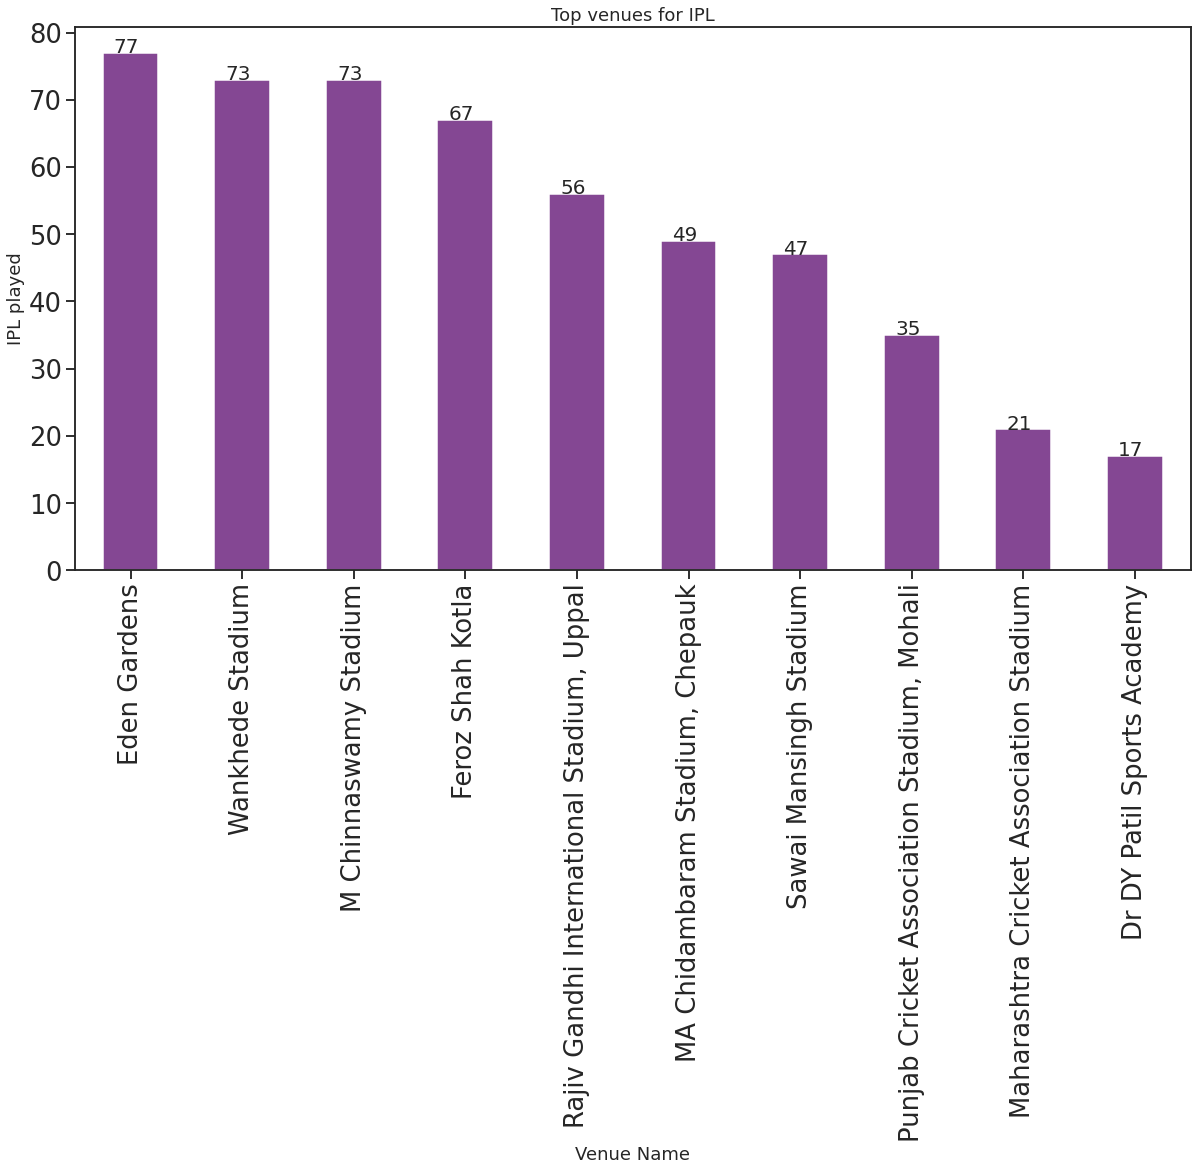

In [56]:
venue_IPL=top_venue.plot(kind="bar", figsize=(20,10), fontsize="x-large")
plt.title("Top venues for IPL")
plt.xlabel("Venue Name")
plt.ylabel("IPL played")
for i in venue_IPL.patches:
        venue_IPL.text(i.get_x()+0.1, i.get_height(), i.get_height(), fontsize=20)


IPL for played the highest times at Eden Gardens for 77 times. While Wankhede Stadium and M Chinaswany stadium both were hosting IPL matches for about 73 times

# **Matches played in every season**

In [57]:

matches_season=df_matches["season"].value_counts()
print(matches_season)

2013    76
2012    74
2011    73
2019    60
2018    60
2016    60
2014    60
2010    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64


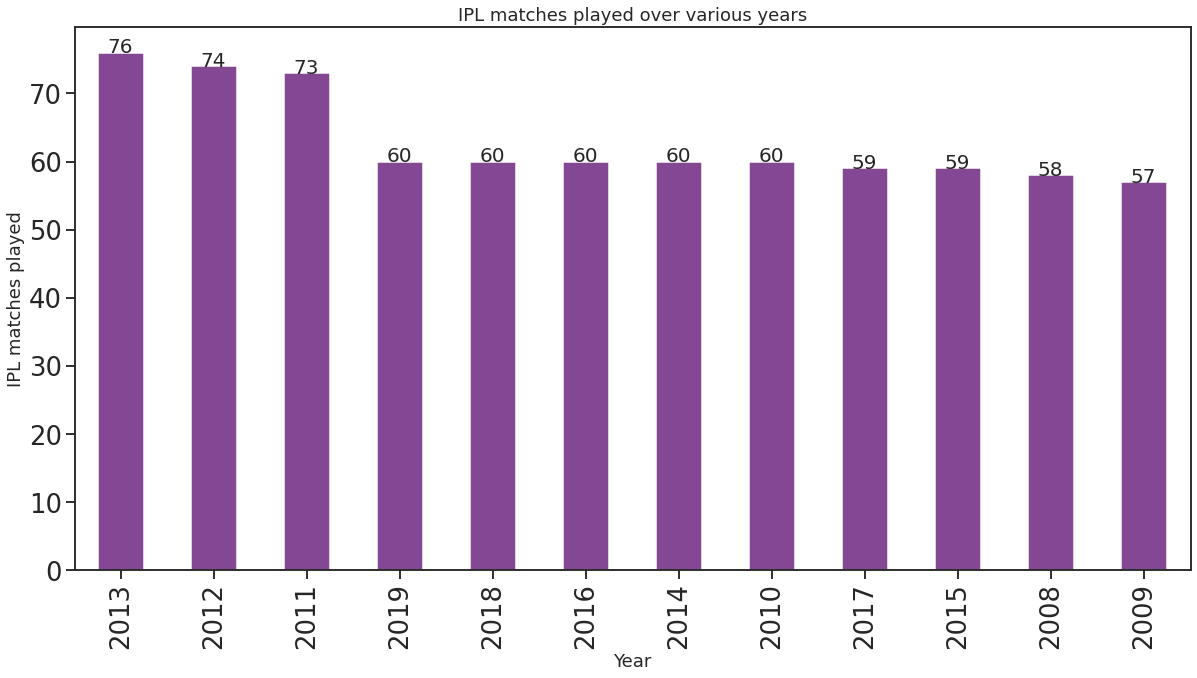

In [58]:
season_matches=matches_season.plot(kind="bar", figsize=(20,10), fontsize="x-large")
plt.title("IPL matches played over various years")
plt.xlabel("Year")
plt.ylabel("IPL matches played")
for i in season_matches.patches:
        season_matches.text(i.get_x()+0.1, i.get_height(), i.get_height(), fontsize=20)


Highest number of matches were played in the following 3 years, 76 matches in 2013, 74 matches in 2012 and 73 matches in 2011

# **Dismissal Kind**

In [59]:
dismissal=df_deliveries["dismissal_kind"].value_counts()
print(dismissal)

caught                   5348
bowled                   1581
run out                   852
lbw                       540
stumped                   278
caught and bowled         211
retired hurt               12
hit wicket                 10
obstructing the field       2
Name: dismissal_kind, dtype: int64


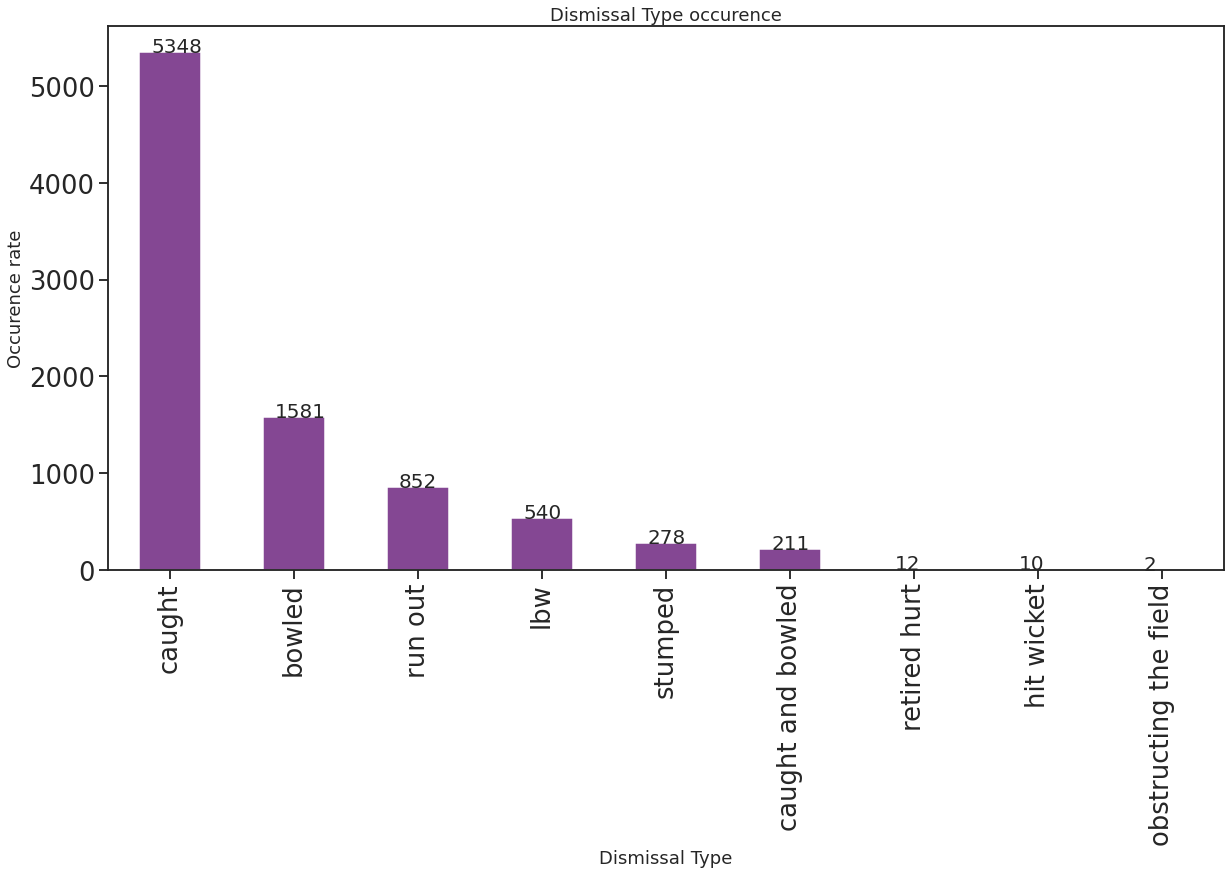

In [60]:

dismissal_type=dismissal.plot(kind="bar", figsize=(20,10), fontsize="x-large")
plt.title("Dismissal Type occurence")
plt.xlabel("Dismissal Type")
plt.ylabel("Occurence rate")
for i in dismissal_type.patches:
        dismissal_type.text(i.get_x()+0.1, i.get_height(), i.get_height(), fontsize=20)

The highest type of dismissal occured was by being caiught and the least by obstructing the field